**Разведочный анализ данных**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)

Mounted at /content/gdrive


In [ ]:
import numpy as np
import pandas as pd
from numpy import mean
from numpy import std

from sklearn.feature_selection import mutual_info_classif, f_classif
from sklearn.feature_selection import SelectKBest

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

from sklearn.datasets import make_classification

plt.style.use('bmh')

In [ ]:
data = pd.read_csv('/content/gdrive/MyDrive/healthcare_dataset.csv', sep=',')

Выведем первые пять строк из нашего набора данных

In [ ]:
data.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal


Размерность данных

In [ ]:
data.shape

(10000, 15)

Информация о признаках (тип данных, количество)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

При вызове метода info() можно узнать важную информацию про набор данных. Так информация представленная в 3-ем столбце под названием "Dtype", позволяет сделать следующие выводы:
1.   12 категориальных признаков (object).
2.   1 признак является непрерывным (float64).
3.   2 признака принимают только целочисленные значения (int64).

Для нашей работы имеют значения только признаки: Возраст, Пол, Группа крови, Заболевание, Назначенный препарат, Результат теста

Выделим признаки

In [ ]:
selected_columns = data.iloc[:, [1, 2, 3, 4, 13, 14]]

In [ ]:
print(selected_columns)

      Age  Gender Blood Type Medical Condition   Medication  Test Results
0      81  Female         O-          Diabetes      Aspirin  Inconclusive
1      35    Male         O+            Asthma      Lipitor        Normal
2      61    Male         B-           Obesity      Lipitor        Normal
3      49    Male         B-            Asthma   Penicillin      Abnormal
4      51    Male         O-         Arthritis  Paracetamol        Normal
...   ...     ...        ...               ...          ...           ...
9995   83    Male         A+           Obesity    Ibuprofen      Abnormal
9996   47  Female        AB+         Arthritis    Ibuprofen        Normal
9997   54    Male         B-         Arthritis    Ibuprofen        Normal
9998   84    Male         A+         Arthritis   Penicillin        Normal
9999   20    Male         B-         Arthritis   Penicillin      Abnormal

[10000 rows x 6 columns]


Проверяем наличие дубликатов

In [ ]:
selected_columns.duplicated().sum()

470

Удаление дубликатов

In [ ]:
selected_columns = selected_columns.drop_duplicates()

Размерность данных после удаления дубликатов

In [ ]:
selected_columns.shape

(9530, 6)

Число пропущенных значений

In [ ]:
selected_columns.isna().sum()

Age                  0
Gender               0
Blood Type           0
Medical Condition    0
Medication           0
Test Results         0
dtype: int64

Гистограмма с количеством людей и соответствующим возрастом

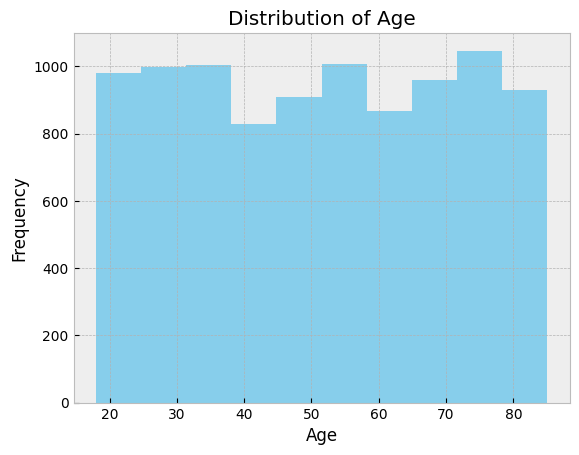

In [ ]:
selected_columns['Age'].hist(color="skyblue")
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

Соотношение количества людей в наборе данных с заболеваниями

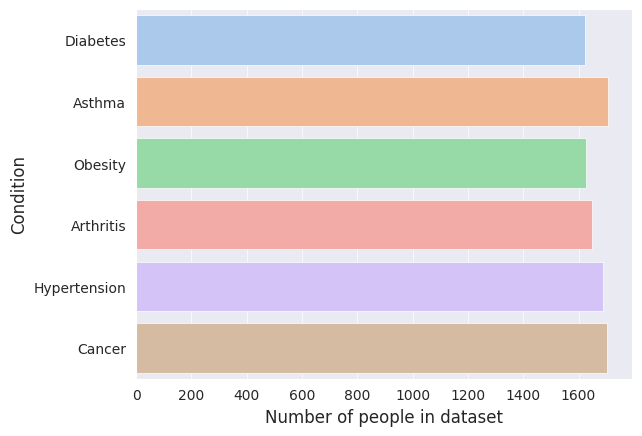

In [ ]:
sns.set_style('darkgrid')
sns.countplot(y='Medical Condition',data=data,palette='pastel')
plt.xlabel('Number of people in dataset')
plt.ylabel('Condition')
plt.show()

Дополнительная визуализация возраста из набора данных

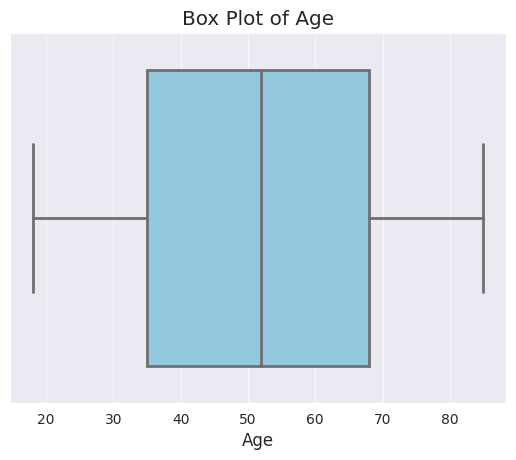

In [ ]:
sns.boxplot(x='Age', data=selected_columns, color='skyblue')
plt.xlabel('Age')
plt.title('Box Plot of Age')
plt.show()

Анализ связи между полом и заболеванием

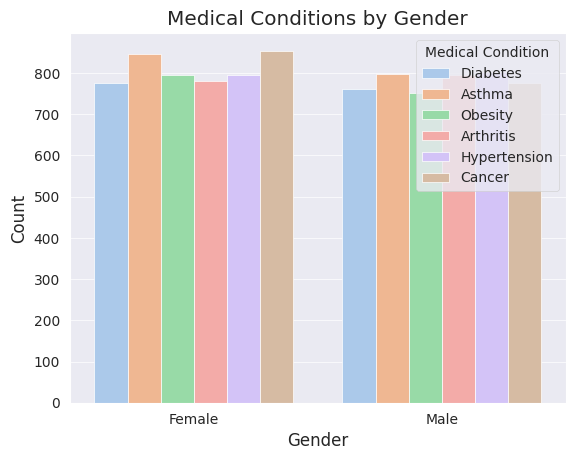

In [ ]:
sns.countplot(x='Gender', hue='Medical Condition', data=selected_columns, palette='pastel')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Medical Conditions by Gender')
plt.show()

Распределение результатов теста с количеством людей в наборе данных

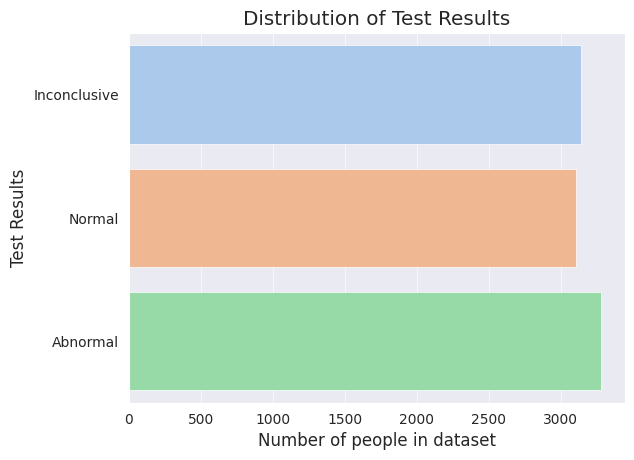

In [ ]:
sns.countplot(y='Test Results', data=selected_columns, palette='pastel')
plt.xlabel('Number of people in dataset')
plt.ylabel('Test Results')
plt.title('Distribution of Test Results')
plt.show()

In [ ]:
!pip install pandas_profiling --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.6/357.6 kB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 16.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 49.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 39.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 88.1 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=5a9db72e7a8bf24045136bc0e6ddf0e16ebb9f4c494a50e59c6fa53cb4c8e870
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.4 MB/s eta 0:00:00


**Преобразование категориальных признаков в числовые**

In [ ]:
from category_encoders import OrdinalEncoder
# from sklearn.preprocessing import LabelEncoder
# label_encoder = LabelEncoder()
categorical_columns = ['Gender', 'Blood Type', 'Medical Condition', 'Medication', 'Test Results']

ordinal_encoder = OrdinalEncoder(cols=categorical_columns)
selected_columns = ordinal_encoder.fit_transform(selected_columns)

# for col in categorical_columns:
#     selected_columns[col] = label_encoder.fit_transform(selected_columns[col])
# selected_columns.head()

Возраст

In [ ]:
selected_columns['Age'].value_counts()

59    167
31    165
35    164
78    161
20    160
     ... 
45    120
22    119
27    117
85    115
47    114
Name: Age, Length: 68, dtype: int64

Пол

In [ ]:
print("1 - Female, 2 - Male")
selected_columns['Gender'].value_counts()

1 - Female, 2 - Male


1    4847
2    4683
Name: Gender, dtype: int64

Группа крови

In [ ]:
print("4: AB-, 3: AB+, 6: B-, 7: O+, 1: A+, 2: A-, 5: B+, 8: O-")
selected_columns['Blood Type'].value_counts()

4: AB-, 3: AB+, 6: B-, 7: O+, 1: A+, 2: A-, 5: B+, 8: O-


6    1218
4    1205
3    1194
2    1189
5    1186
7    1185
8    1180
1    1173
Name: Blood Type, dtype: int64

Заболевание

In [ ]:
print("2: Asthma, 3: Cancer, 5: Hypertension, 1: Arthritis, 6: Obesity, 4: Diabetes")
selected_columns['Medical Condition'].value_counts()

2: Asthma, 3: Cancer, 5: Hypertension, 1: Arthritis, 6: Obesity, 4: Diabetes


2    1642
6    1629
5    1599
4    1576
3    1547
1    1537
Name: Medical Condition, dtype: int64

Лекарство

In [ ]:
print("5: Penicilin, 3: Lipitor, 2: Ibuprofen, 1: Aspirin, 4: Paracetamol")
selected_columns['Medication'].value_counts()

5: Penicilin, 3: Lipitor, 2: Ibuprofen, 1: Aspirin, 4: Paracetamol


3    1979
2    1918
5    1892
1    1873
4    1868
Name: Medication, dtype: int64

Результаты теста

In [ ]:
print("1: Abnormal, 2: Inconclusive, 3: Normal")
selected_columns['Test Results'].value_counts()

1: Abnormal, 2: Inconclusive, 3: Normal


3    3281
1    3143
2    3106
Name: Test Results, dtype: int64

Соотношение пола и результатов теста

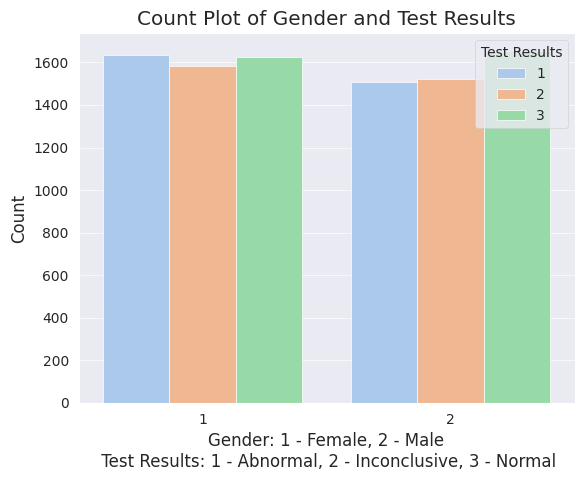

In [ ]:
sns.countplot(x='Gender', hue='Test Results', data=selected_columns, palette='pastel')
plt.xlabel('Gender: 1 - Female, 2 - Male\n Test Results: 1 - Abnormal, 2 - Inconclusive, 3 - Normal')
plt.ylabel('Count')
plt.title('Count Plot of Gender and Test Results')
plt.show()

In [ ]:
selected_columns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9530 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Age                9530 non-null   int64
 1   Gender             9530 non-null   int64
 2   Blood Type         9530 non-null   int64
 3   Medical Condition  9530 non-null   int64
 4   Medication         9530 non-null   int64
 5   Test Results       9530 non-null   int64
dtypes: int64(6)
memory usage: 521.2 KB


In [ ]:
print(selected_columns)

      Age  Gender  Blood Type  Medical Condition  Medication  Test Results
0      81       1           1                  1           1             1
1      35       2           2                  2           2             2
2      61       2           3                  3           2             2
3      49       2           3                  2           3             3
4      51       2           1                  4           4             2
...   ...     ...         ...                ...         ...           ...
9994   69       2           5                  1           3             1
9995   83       2           5                  3           5             3
9996   47       1           4                  4           5             2
9997   54       2           3                  4           5             2
9999   20       2           3                  4           3             3

[9530 rows x 6 columns]


С целью улучшения эффективности работы ансамбля градиентного бустинга мы проведем биннинг возраста, разделив его на 10 интервалов

In [ ]:
selected_columns['Age'] = selected_columns['Age'] // 10
print(selected_columns)

      Age  Gender  Blood Type  Medical Condition  Medication  Test Results
0       8       1           1                  1           1             1
1       3       2           2                  2           2             2
2       6       2           3                  3           2             2
3       4       2           3                  2           3             3
4       5       2           1                  4           4             2
...   ...     ...         ...                ...         ...           ...
9994    6       2           5                  1           3             1
9995    8       2           5                  3           5             3
9996    4       1           4                  4           5             2
9997    5       2           3                  4           5             2
9999    2       2           3                  4           3             3

[9530 rows x 6 columns]


Разделим признаки на X и y:

1.   X - матрица признаков (Возраст, пол, группа крови, заболевание, лекарство)
2.   y - предсказываемый вектор целевых значений (Результаты теста)



In [ ]:
X = selected_columns.iloc[:, [0, 1, 2, 3, 4]]
y = selected_columns.iloc[:, [5]]

In [ ]:
print(X)

      Age  Gender  Blood Type  Medical Condition  Medication
0       8       1           1                  1           1
1       3       2           2                  2           2
2       6       2           3                  3           2
3       4       2           3                  2           3
4       5       2           1                  4           4
...   ...     ...         ...                ...         ...
9994    6       2           5                  1           3
9995    8       2           5                  3           5
9996    4       1           4                  4           5
9997    5       2           3                  4           5
9999    2       2           3                  4           3

[9530 rows x 5 columns]


In [ ]:
print(y)

      Test Results
0                1
1                2
2                2
3                3
4                2
...            ...
9994             1
9995             3
9996             2
9997             2
9999             3

[9530 rows x 1 columns]


Разделенеие данных на обучающую и тестовую выборку, вывод размеров

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7147, 5) (2383, 5) (7147, 1) (2383, 1)


Стандартизация признаков с помощью StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Создание и обучение модели GB, прогнозирование значений для тестового набора данных, вычисление и вывод метрик качества

In [ ]:
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(X_train, y_train.values.ravel())
y_pred_gb = gb_classifier.predict(X_test)
accuracy_gb = metrics.accuracy_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb, average='micro')
print(f"GB score: {accuracy_gb}")
print(f"F1: {f1_gb}")

GB score: 0.32228283676038605
F1: 0.32228283676038605


Вычисление макро-усредненного ROC-AUC, вычисление ROC-кривых, построение кривой ROC для каждого класса.

Площадь под кривой ROC (Receiver Operating Characteristic, ROC AUC) — это метрика, используемая для оценки качества бинарной (двухклассовой) классификации. Кривая ROC представляет собой график зависимости доли ложных положительных результатов (False Positive Rate, FPR) от доли истинно положительных результатов (True Positive Rate, TPR) при варьировании порога классификации

Существует два основных варианта использования при задачи многоклассовой классификации с тремя классами:

1. Микро-усреднение (Micro-Averaging): Вычисляет ROC-AUC, учитывая все классы вместе. Это подходящий выбор, если у вас нет предпочтения по отношению к классам.
2. Макро-усреднение (Macro-Averaging): Вычисляет ROC-AUC для каждого класса независимо, а затем усредняет их. Это предпочтительный вариант, если каждый класс важен в равной степени.

В данном случае мы используем макро-усреднение



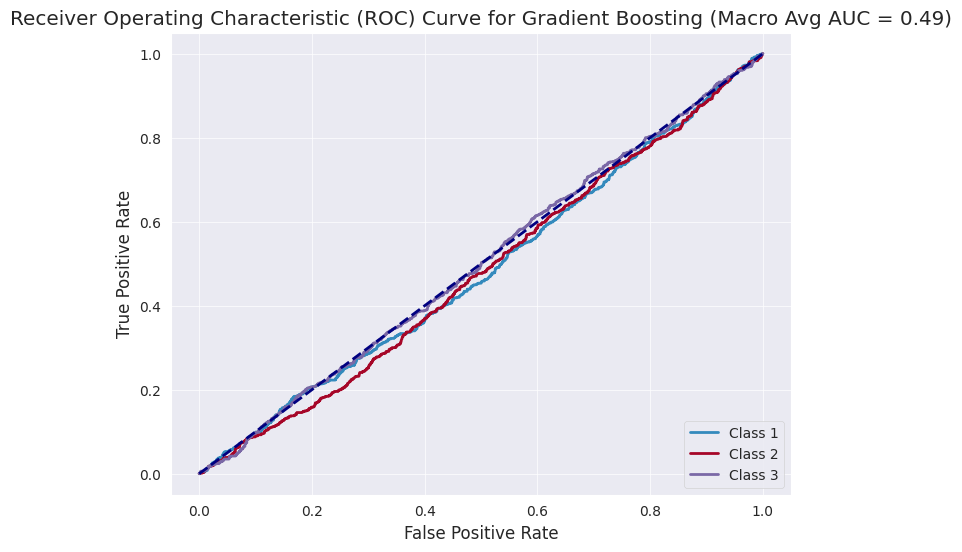

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(X_train, y_train.values.ravel())

y_pred_gb_proba = gb_classifier.predict_proba(X_test)

roc_auc_gb = roc_auc_score(y_test, y_pred_gb_proba, multi_class='ovr')

fpr_gb = dict()
tpr_gb = dict()
for i in range(3):
    fpr_gb[i], tpr_gb[i], _ = roc_curve(y_test == i + 1, y_pred_gb_proba[:, i])

plt.figure(figsize=(8, 6))
for i in range(3):
    plt.plot(fpr_gb[i], tpr_gb[i], label=f'Class {i + 1}')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Receiver Operating Characteristic (ROC) Curve for Gradient Boosting (Macro Avg AUC = {roc_auc_gb:.2f})')

plt.legend(loc='lower right')

plt.show()


Создание модели KNN, использование GridSearchCV для настройки параметров прогнозирование на тестовых данных, оценка качества модели


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [1, 3, 5, 7, 9], 'weights': ['uniform', 'distance']}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train_scaled, y_train.values.ravel())

best_params_knn = grid_search.best_params_

best_knn = KNeighborsClassifier(n_neighbors=best_params_knn['n_neighbors'], weights=best_params_knn['weights'])
best_knn.fit(X_train_scaled, y_train.values.ravel())

y_pred_knn = best_knn.predict(X_test_scaled)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn, average='micro')

print(f"Best Params KNN: {best_params_knn}")
print(f"KNN Accuracy: {accuracy_knn}")
print(f"KNN F1-score: {f1_knn}")


Best Params KNN: {'n_neighbors': 1, 'weights': 'uniform'}
KNN Accuracy: 0.3130507763323542
KNN F1-score: 0.3130507763323542


Вычисление и вывод матрицы ошибок и отчета о классификации для KNN & GB


*  Precision: Показывает, какая доля предсказанных положительных случаев действительно является положительными. Вычисляется как TP / (TP + FP).
* Recall: Показывает, какая доля фактических положительных случаев была правильно предсказана. Вычисляется как TP / (TP + FN).
* F1-score: Среднее гармоническое между precision и recall. Представляет собой баланс между точностью и полнотой.
* Support: Количество точек данных в каждом классе.
* Accuracy: Доля правильных предсказаний по всем классам.
* Macro avg: Среднее значение precision, recall и f1-score для каждого класса.
* Weighted avg: Взвешенное среднее precision, recall и f1-score, учитывая дисбаланс в размере классов  



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

conf_matrix = confusion_matrix(y_test, y_pred_knn)

print("Confusion Matrix KNN:")
print(conf_matrix)

class_report = classification_report(y_test, y_pred_knn)
print("\nClassification Report KNN:")
print(class_report)


Confusion Matrix KNN:
[[260 247 269]
 [269 240 267]
 [300 285 246]]

Classification Report KNN:
              precision    recall  f1-score   support

           1       0.31      0.34      0.32       776
           2       0.31      0.31      0.31       776
           3       0.31      0.30      0.31       831

    accuracy                           0.31      2383
   macro avg       0.31      0.31      0.31      2383
weighted avg       0.31      0.31      0.31      2383



In [ ]:
y_pred_gb = gb_classifier.predict(X_test)

conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
class_report_gb = classification_report(y_test, y_pred_gb)

print("\nConfusion Matrix Gradient Boosting:")
print(conf_matrix_gb)

print("\nClassification Report Gradient Boosting:")
print(class_report_gb)


Confusion Matrix Gradient Boosting:
[[231 232 313]
 [242 181 353]
 [261 214 356]]

Classification Report Gradient Boosting:
              precision    recall  f1-score   support

           1       0.31      0.30      0.31       776
           2       0.29      0.23      0.26       776
           3       0.35      0.43      0.38       831

    accuracy                           0.32      2383
   macro avg       0.32      0.32      0.32      2383
weighted avg       0.32      0.32      0.32      2383



KNN:
Точность: около 31%
F1-мера: около 31%

Класс 1: precision 0.31, recall 0.34, f1-score 0.32
Класс 2: precision 0.31, recall 0.31, f1-score 0.31
Класс 3: precision 0.31, recall 0.30, f1-score 0.31


Градиентный бустинг:
Точность: около 32%
F1-мера: около 32%

Класс 1: precision 0.31, recall 0.30, f1-score 0.31
Класс 2: precision 0.29, recall 0.23, f1-score 0.26
Класс 3: precision 0.35, recall 0.43, f1-score 0.38

Вывод:
Обе модели имеют схожую производительность с небольшими различиями. Точность и F1-мера находятся на уровне примерно 31-32%. Градиентный бустинг показывает немного лучшие результаты по recall для класса 3, но немного хуже для класса 2 по сравнению с K-ближайшими соседями. Исходя из этих данных, нельзя однозначно определить, какая модель лучше. Выбор между ними может зависеть от конкретных требований задачи, склонности к определенным типам ошибок и других факторов. Может быть полезным провести дополнительные эксперименты или оптимизировать параметры моделей

In [ ]:
!pip install tk

In [ ]:
 def preprocess_data(age, gender, blood_type, medical_condition, medication):
    data = {
        'Age': [int(age)],
        'Gender': [gender],
        'Blood Type': [blood_type],
        'Medical Condition': [medical_condition],
        'Medication': [medication]
    }

    df = pd.DataFrame(data)

    df['Gender'] = df['Gender'].map({'Male': 2, 'Female': 1})
    df['Blood Type'] = df['Blood Type'].map({'A+': 1, 'A-': 2, 'AB+': 3, 'AB-': 4, 'B+': 5, 'B-': 6, 'O+': 7, 'O-': 8})
    df['Medical Condition'] = df['Medical Condition'].map({
        'Arthritis': 1, 'Asthma': 2, 'Cancer': 3, 'Diabetes': 4, 'Hypertension': 5, 'Obesity': 6
    })
    df['Medication'] = df['Medication'].map({'Penicilin': 5, 'Lipitor': 3, 'Ibuprofen': 2, 'Aspirin': 1, 'Paracetamol':4})

    return df

def predict_knn(input_data):
    X_input_scaled = scaler.transform(input_data)

    prediction = best_knn.predict(X_input_scaled)

    return prediction[0]

age = input("Enter Age: ")
gender = input("Enter Gender (Male/Female): ")
blood_type = input("Enter Blood Type: ")
medical_condition = input("Enter Medical Condition: ")
11
medication = input("Enter Medication: ")

input_data = preprocess_data(age, gender, blood_type, medical_condition, medication)

input_data = input_data.fillna(0)

prediction = predict_knn(input_data)

print(f"Predicted Class: {prediction}")


Enter Age: 6
Enter Gender (Male/Female): 2
Enter Blood Type: 4
Enter Medical Condition: 5
Enter Medication: 2
Predicted Class: 1


In [ ]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import f1_score

def preprocess_data_gb(age, gender, blood_type, medical_condition, medication):
    data = {
        'Age': [int(age)],
        'Gender': [gender],
        'Blood Type': [blood_type],
        'Medical Condition': [medical_condition],
        'Medication': [medication]
    }

    df = pd.DataFrame(data)

    df['Gender'] = df['Gender'].map({'Male': 2, 'Female': 1})
    df['Blood Type'] = df['Blood Type'].map({'A+': 1, 'A-': 2, 'AB+': 3, 'AB-': 4, 'B+': 5, 'B-': 6, 'O+': 7, 'O-': 8})
    df['Medical Condition'] = df['Medical Condition'].map({
        'Arthritis': 1, 'Asthma': 2, 'Cancer': 3, 'Diabetes': 4, 'Hypertension': 5, 'Obesity': 6
    })
    df['Medication'] = df['Medication'].map({'Penicilin': 5, 'Lipitor': 3, 'Ibuprofen': 2, 'Aspirin': 1, 'Paracetamol': 4})

    return df

def predict_gb(input_data):
    X_input_scaled = scaler.transform(input_data)

    prediction = gb_classifier.predict(X_input_scaled)

    return prediction[0]

age_gb = input("Enter Age: ")
gender_gb = input("Enter Gender (Male/Female): ")
blood_type_gb = input("Enter Blood Type: ")
medical_condition_gb = input("Enter Medical Condition: ")
medication_gb = input("Enter Medication: ")

input_data_gb = preprocess_data_gb(age_gb, gender_gb, blood_type_gb, medical_condition_gb, medication_gb)

input_data_gb = input_data_gb.fillna(0)

prediction_gb = predict_gb(input_data_gb)

print(f"Predicted Class: {prediction_gb}")

y_pred_gb = gb_classifier.predict(X_test)
accuracy_gb = metrics.accuracy_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb, average='micro')
print(f"GB score: {accuracy_gb}")
print(f"F1: {f1_gb}")

Enter Age: 3
Enter Gender (Male/Female): 5
Enter Blood Type: 2
Enter Medical Condition: 2
Enter Medication: 3
Predicted Class: 2
GB score: 0.32228283676038605
F1: 0.32228283676038605


In [ ]:
!pip install gradio

In [ ]:
!pip install gradio --upgrade


Довольно низкую точность можно аргументировать дисбалансом классов (y) и сложность задачи (шумы...)